### WEEK 12 PRACTICE

In [43]:
import pandas as pd
df=pd.read_csv('customer_data.csv')
df.head()

,Age,Income,Satisfaction_Score,Wait_Time_Minutes,Purchase_Count,Gender,Education_Level
0,56,81832,1,8.66,3,Female,High School
1,69,65486,7,10.87,8,Other,Bachelor
2,46,27209,8,1.00,8,Female,High School
3,32,42736,3,10.56,5,Female,Master
4,60,69003,6,3.74,8,Female,Master


In [44]:
df.groupby('Gender')['Income'].mean()

Gender
Female    48361.500000
Male      50813.025862
Other     49127.947368
Name: Income, dtype: float64

##### Finding male and female salaries as 2 numeric series. 

In [45]:
male_salary=df[df['Gender']=='Male']['Income']
female_salary=df[df['Gender']=='Female']['Income']

In [46]:
from scipy.stats import ttest_ind
stat,p= ttest_ind(male_salary,female_salary,equal_var=False)
print(p)

0.07708911413248488


From the above output, its clear that the difference between male salary and female salary is by chance 

In [9]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
survived=df[df['Survived']==1]['Age'].dropna()
non_survived=df[df['Survived']==0]['Age'].dropna()

In [15]:
from scipy.stats import ttest_ind
stat,p= ttest_ind(survived,non_survived,equal_var=False)
print(p)

0.04118965162586639


From the above, its understandable that average age is significantly different

#### Paired t-test

In [ ]:
before=df['before_score'].dropna()
after=df['after_score'].dropna()

import scipy.stats import ttest_rel
stat,p= ttest_rel(before,after)
print(p)

In [48]:
model_A = [0.82, 0.80, 0.83, 0.85, 0.81, 0.79, 0.84, 0.82, 0.83, 0.81]
model_B = [0.84, 0.85, 0.86, 0.87, 0.83, 0.82, 0.88, 0.86, 0.87, 0.84]

from scipy.stats import ttest_rel
stat,p= ttest_rel(model_A,model_B)
print(p)

4.239738886259881e-06


The above result is in scientific notation coz the answer is too small. 

Since it will be lesser than 0.05, we know that the null hypothesis is not true which is Model B works better than model A. 


##### Which model is better?

In [49]:
import numpy as np
np.mean(model_A),np.mean(model_B)

(np.float64(0.82), np.float64(0.852))

Model B has a higher mean accuracy and the difference is statistically significant

##### Construct a 95% confidence interval for the mean accuracy of each model.

In [52]:
# CI for model A

Model_A=[0.82, 0.80, 0.83, 0.85, 0.81, 0.79, 0.84, 0.82, 0.83, 0.81]

mean=np.mean(Model_A)
std=np.std(Model_A)
n=len(Model_A)

se=std/np.sqrt(n)

t_value=t.ppf(0.0975,df=n-1)

lower=mean-t_value*se
upper=mean+t_value*se

(lower,upper)

(np.float64(0.8276686565101796), np.float64(0.8123313434898203))

We are 95% confident that the true mean accuracy of Model A lies between approximately 81.2% and 82.8%.

In [54]:
# CI for model B

Model_B= [0.84, 0.85, 0.86, 0.87, 0.83, 0.82, 0.88, 0.86, 0.87, 0.84]

mean=np.mean(Model_B)
std=np.std(Model_B)
n=len(Model_B)

se=std/np.sqrt(n)

t_value=t.ppf(0.0975,df=n-1)

lower=mean-t_value*se
upper=mean+t_value*se

(lower,upper)

(np.float64(0.8601157432063647), np.float64(0.8438842567936352))

We are 95% confident that the true mean accuracy of Model B lies between approximately 84.4% and 86.0%

##### The confidence interval for Model B lies entirely above that of Model A, indicating that Model B consistently achieves higher accuracy, which aligns with the significant result from the paired t-test.

#### CHI-SQUARE TEST FOR INDEPENDENCE

First step- Create Contingency table

In [24]:
pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [25]:
from scipy.stats import chi2_contingency
table=pd.crosstab(df['Sex'],df['Survived'])
chi2, p, dof, expected= chi2_contingency(table)
print(p)

1.1973570627755645e-58


This tells us that there is a significant relation between Genders and Survival since p-value is lesser than 0.05.

In [27]:
df=pd.read_csv('customer_data.csv')

table=pd.crosstab(df['Gender'],df['Satisfaction_Score'])

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table)
print(p)

0.09518025621636061


##### ONE-WAY ANOVA
To learn and understand how One-Way ANOVA works, we are doing a question simply without actually having the dataset. (Only assuming)

In [ ]:
df.groupby('method')['Score'].mean()

grp_A=df[df['method']=='A']['Score'].dropna() #Why do we extract group_A, group_B, group_C separately?
grp_B=df[df['method']=='B']['Score'].dropna() #Ans: Because ANOVA works on separate numerical samples, so we must pass the numerical values of each group individually to the function.
grp_C=df[df['method']=='C']['Score'].dropna()

from scipy.stats import f_oneway
stat,p = f_oneway(grp_A,grp_B,grp_C)
print(p)

From the above p value, if we had recieved a value which is lesser than 0.05 its states that atleast one group mean is different. If not there is no significant difference. However One way ANOVA only tells us there is a difference, inorder to know which group mean has different mean, then we have to do post-hoc tests. 

#### 🔹 COMMON BEGINNER MISTAKES-ONE-WAY ANOVA (AVOID THESE)

❌ Passing categorical data into ANOVA
❌ Forgetting .dropna()
❌ Using ANOVA for only 2 groups
❌ Interpreting ANOVA as “which group is best”

#### Assuming we got a value less than 0.05, we are gonna find which group using post hoc test/Tukey's HSD.

In [ ]:
#importing function
from statsmodel.stats.multicomb import pairwise_tukeyhsd

#Run Tukey's Test
tukey=pairwise_tukeyhsd(
    endog=df['Score'],
    groups=df['method'],
    alpha=0.05
)
print(tukey)

#### Task: Analyzing Customer Satisfaction Data

Scenario:
You are given a dataset of customer satisfaction survey results for an online store. The dataset contains:

	•	CustomerID (Nominal)
	•	SatisfactionScore (Ordinal: 1 = Poor, 5 = Excellent)
	•	DeliveryTimeDays (Interval)
	•	PurchaseAmount (Ratio)
	•	Gender (Nominal: Male/Female)


Your Tasks

	1.	Descriptive Statistics & Visualization
	•	Calculate mean, median, mode, variance, and standard deviation for PurchaseAmount and DeliveryTimeDays.
	•	Create a histogram for PurchaseAmount and a box plot for DeliveryTimeDays.
	•	Check skewness and kurtosis for PurchaseAmount.
    
	2.	Probability & Sampling
	•	Randomly select a sample of 30 customers and calculate the sample mean PurchaseAmount.
	•	Using the Central Limit Theorem, estimate the probability that the sample mean is greater than a given threshold (e.g., ₹1,500) assuming normality.
    
	3.	Hypothesis Testing
	•	Perform a two-sample t-test to check if the mean PurchaseAmount differs between Male and Female customers.
	•	Perform a chi-square test for independence to check if Gender is related to SatisfactionScore.
    
	4.	Interpretation
	•	Summarize findings in 3–4 bullet points, explaining business implications.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('customer_satisfaction_sample (1).csv')
df.head()

,CustomerID,SatisfactionScore,DeliveryTimeDays,PurchaseAmount,Gender
0,1,2,5.95,1435.55,Male
1,2,4,4.76,1598.51,Female
2,3,4,6.27,2696.80,Male
3,4,4,8.52,2553.07,Female
4,5,4,4.61,1983.35,Female


In [10]:
df[['DeliveryTimeDays','PurchaseAmount']].describe()

,DeliveryTimeDays,PurchaseAmount
count,300.000000,300.00000
mean,5.302533,2137.09770
std,1.990232,872.00973
min,1.610000,744.15000
25%,3.935000,1508.91250
50%,5.105000,1985.04000
75%,6.222500,2559.17250
max,19.260000,6853.09000


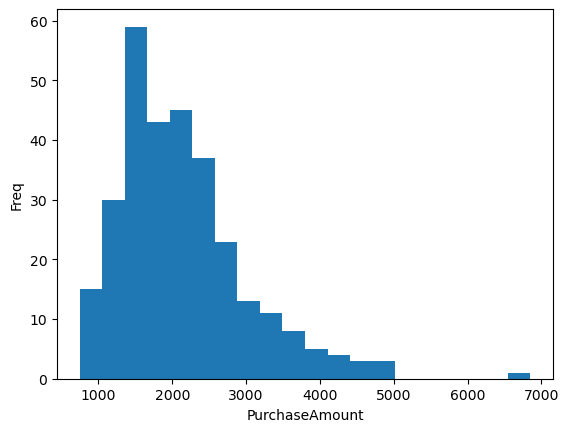

In [11]:
plt.hist(df['PurchaseAmount'],bins=20)
plt.xlabel('PurchaseAmount')
plt.ylabel('Freq')
plt.show()

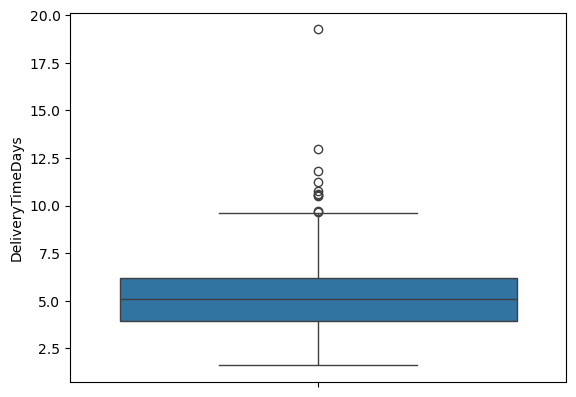

In [13]:
sns.boxplot(df['DeliveryTimeDays'])
plt.show()

In [15]:
print(df['PurchaseAmount'].skew())
print(df['PurchaseAmount'].kurt())

1.3614334876097387
3.094011825322587


In [19]:
sample=df.sample(n=30,random_state=42)
sample['PurchaseAmount'].mean().round(2)

np.float64(1932.79)

In [21]:
from scipy.stats import norm
mean=df['PurchaseAmount'].mean()
std=df['PurchaseAmount'].std()
n=30

se=std/np.sqrt(n)
prob=1-norm.cdf(1500,mean,se)
prob.round(2)

np.float64(1.0)

In [22]:
male=df[df['Gender']=='Male']['PurchaseAmount'].dropna()
female=df[df['Gender']=='Female']['PurchaseAmount'].dropna()

from scipy.stats import ttest_ind
stat,p=ttest_ind(male,female)
print(p)

0.7252496535047341


There is statistically no significant difference

In [23]:
table=pd.crosstab(df['Gender'],df['SatisfactionScore'])
table
from scipy.stats import chi2_contingency
chi2,p,dof,expected=chi2_contingency(table)
print(p)

0.4569371137118481


### TITANIC PRACTICE

In [2]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
survived=df[df['Survived']==1]['Age'].dropna()
non_survived=df[df['Survived']==0]['Age'].dropna()

from scipy.stats import ttest_ind
stat,p=ttest_ind(survived,non_survived)
print(p)

0.03912465401348249


In [4]:
table=pd.crosstab(df['Sex'],df['Survived'])
table

Survived,0,1
Sex,,
female,81,233
male,468,109


In [6]:
from scipy.stats import chi2_contingency
chi2,p,dof,expected=chi2_contingency(table)
p

np.float64(1.1973570627755645e-58)

##### a) Write Python code to compute a 95% confidence interval for the mean Fare of survivors.

In [37]:
fare_survived=df[df['Survived']==1]['Fare'].dropna()

from scipy.stats import t

mean=fare_survived.mean()
std=fare_survived.std()
n=len(fare_survived)
se=std/(n**0.5)

t_value=t.ppf(0.975,df=n-1)
lower=mean-t_value*se
upper=mean+t_value*se
lower,upper

(np.float64(41.312136804634115), np.float64(55.47867840004425))

We are 95% confident that the true mean fare paid by survivors lies between the computed lower and upper limits.

#### Z-TEST FOR PROPORTION
Use z-test when testing proportions or percentages with large samples.

Examples:

Conversion rate

Defect rate

Success rate

Click-through rate

#### Question
An online platform claims that 60% of users complete a purchase.
From a sample of 200 users, 110 completed a purchase.
Test whether the conversion rate is significantly different at α = 0.05.

In [39]:
from statsmodels.stats.proportion import proportions_ztest
successes=110
n=200
p0=0.60

z_stat,p=proportions_ztest(successes,n,value=p0)
p

np.float64(0.1552184896846846)

Since the p-value (0.155) is greater than the 5% significance level, we fail to reject the null hypothesis. There is no statistically significant difference between the observed conversion rate and the claimed conversion rate.”

#### CI FOR PROPORTION

In [40]:
from statsmodels.stats.proportion import proportion_confint
lower,upper=proportion_confint(successes,n,alpha=0.05,method='normal')
(lower,upper)

(0.4810521552867026, 0.6189478447132976)

We are 95% confident that the true conversion rate lies between approximately 48.1% and 61.9%.”

### REVIEW-READY SENTENCES (USE THESE)

“There is a statistically significant difference…”

“There is no sufficient evidence to reject the null hypothesis…”

“The variables are statistically associated…” - used for chi-square test

“This result is consistent with the confidence interval…

#### Question:
1.	Load Dataset
  
	•	Use sklearn.datasets.load_iris() or load from seaborn (sns.load_dataset("iris")).
3.	Descriptive Statistics
  
	•	Compute mean, median, variance, standard deviation for sepal_length and petal_length.
	•	Comment on whether distributions seem symmetric (check skewness).
5.	Data Visualization
  
	•	Create a histogram of sepal_length.
	•	Create a boxplot of petal_length across species to check differences.
7.	Inferential Statistics: Hypothesis Testing
  
	•	Hypothesis: Mean petal length is the same for all three Iris species.
	•	Test: Perform ANOVA 
	•	Report F-statistic and p-value.
9.	Interpret Results
   
	•	If p-value < 0.05 → reject null hypothesis (species differ in petal length).
	•	Otherwise, fail to reject null (no significant difference).

In [3]:
import seaborn as sns

df=sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
mean_s=df['sepal_length'].mean()
median_s=df['sepal_length'].median()
var_s=df['sepal_length'].var()
std_s=df['sepal_length'].std()

print(mean_s, median_s, var_s, std_s)

mean_p=df['petal_length'].mean()
median_p=df['petal_length'].median()
var_p=df['petal_length'].var()
std_p=df['petal_length'].std()

print(mean_p, median_p, var_p, std_p)

skew_s=df['sepal_length'].skew()
skew_p=df['petal_length'].skew()
print(skew_s,skew_p)

5.843333333333334 5.8 0.6856935123042505 0.8280661279778629
3.7580000000000005 4.35 3.1162778523489942 1.7652982332594667
0.3149109566369728 -0.27488417975101276


The sepal length distribution has a small positive skew (≈ 0.31), indicating it is slightly right-skewed but still close to symmetric. The petal length distribution has a small negative skew (≈ −0.27), indicating it is slightly left-skewed and also approximately symmetric.

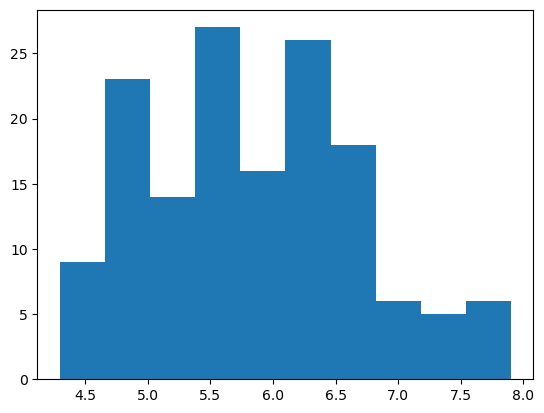

In [5]:
import matplotlib.pyplot as plt
plt.hist(df['sepal_length'])
plt.show()

In [12]:
from scipy.stats import f_oneway

print(df['species'].unique())

grp1=df[df['species']=='setosa']['petal_length'].dropna()
grp2=df[df['species']=='versicolor']['petal_length'].dropna()
grp3=df[df['species']=='virginica']['petal_length'].dropna()

from scipy.stats import f_oneway
stat,p=f_oneway(grp1,grp2,grp3)
stat,p

['setosa' 'versicolor' 'virginica']


(np.float64(1180.161182252981), np.float64(2.8567766109615584e-91))

Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference in mean petal length among the three Iris species.

The variation between species is more than a thousand times larger than the variation within species.

This is extremely strong evidence that the species differ in petal length.

### FINAL QUESTION -PRACTICE

In [13]:
import seaborn as sns
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


b) Compute mean, median, variance, and standard deviation for:
age
fare

c) Check whether fare is approximately symmetric.

In [16]:
mean_a=df['age'].mean()
median_a=df['age'].median()
var_a=df['age'].var()
std_a=df['age'].std()

print(mean_a,median_a,var_a,std_a)

mean_f=df['fare'].mean()
median_f=df['fare'].median()
var_f=df['fare'].var()
std_f=df['fare'].std()

print(mean_f,median_f,var_f,std_f)

s=df['fare'].skew()
s

29.69911764705882 28.0 211.0191247463081 14.526497332334044
32.204207968574636 14.4542 2469.436845743117 49.693428597180905


np.float64(4.787316519674893)

From the above skewness value, we can conclude that its highly right skewed meaning most of the passengers paid lower fares whereas only a few passengers paid higher fares. 

2) Create:
   
A histogram for fare

A boxplot of fare grouped by survived

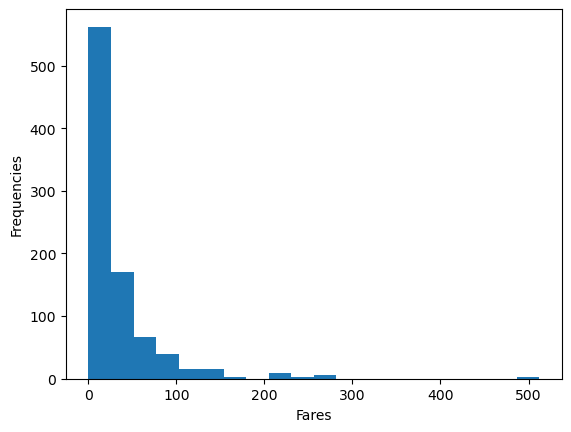

In [18]:
import matplotlib.pyplot as plt
plt.hist(df['fare'],bins=20)
plt.xlabel('Fares')
plt.ylabel('Frequencies')
plt.show()

Accordin to this histogram , we can understand that most passengers paid lower fares which is why the graph has long righ tail indicating that only few passengers paid higher fares. 

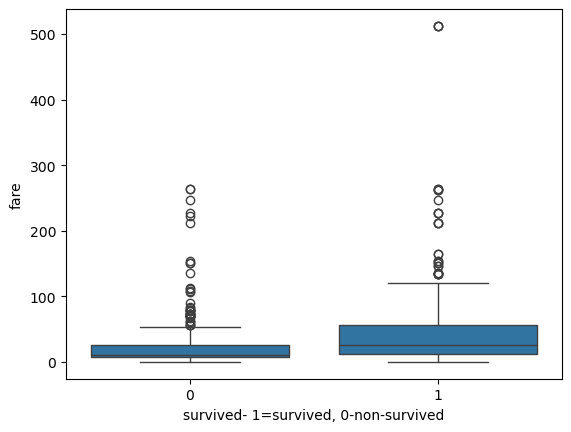

In [32]:
import seaborn as sns

sns.boxplot(x='survived', y='fare',data=df)
plt.xlabel('survived- 1=survived, 0-non-survived')
plt.show()

This boxplot shows us that passengers who has paid higher fares has survived than who paid lower fares which means there is a relation between the fares and the survival rate. 

3) Randomly select a sample of 40 passengers and compute the sample mean fare.

In [36]:
sample=df['fare'].dropna().sample(n=40,random_state=42)
sample

709    15.2458
439    10.5000
840     7.9250
720    33.0000
39     11.2417
290    78.8500
300     7.7500
333    18.0000
208     7.7500
136    26.2833
137    53.1000
696     8.0500
485    25.4667
244     7.2250
344    13.0000
853    39.4000
621    52.5542
653     7.8292
886    13.0000
110    52.0000
294     7.8958
447    26.5500
192     7.8542
682     9.2250
538    14.5000
819    27.9000
30     27.7208
673    13.0000
63     27.9000
396     7.8542
877     7.8958
141     7.7500
793    30.6958
235     7.5500
204     8.0500
620    14.4542
23     35.5000
198     7.7500
842    31.0000
739     7.8958
Name: fare, dtype: float64

4) Using the Central Limit Theorem, estimate the probability that the sample mean fare is greater than 50.

In [39]:
from scipy.stats import norm
import numpy as np

mean=sample.mean()
std=sample.std()
n=40

se=std/np.sqrt(n)

prob=1-norm.cdf(50,mean,se)
prob

np.float64(0.0)

Because when using the Central Limit Theorem, the sampling distribution of the mean has a small standard error, making it extremely unlikely for the sample mean to exceed a high threshold like 50.

5) a) Construct a 95% confidence interval for the mean fare of survivors.

b) Interpret the confidence interval correctly.

In [45]:
fare_survived=df[df['survived']==1]['fare'].dropna()

from scipy.stats import t

mean=fare_survived.mean()
std=fare_survived.std()
n= len('fare_survived')

se=std/np.sqrt(n)

t_value=t.ppf(0.975,df=n-1)

lower=mean-t_value*se
upper=mean+t_value*se

lower,upper

(np.float64(8.15124441302546), np.float64(88.63957079165291))

From the above limits, we can interpret it as we are 95% confident that the mean fare of survivors lies between the above the lower and upper limits. 

6) HYPOTHESIS TESTING — t-TEST

The hypothesis is that survivors paid higher fares than non-survivors.

Null hypothesis: There is no significant difference in the fares between survivors and non survivors. 

Alternate hypothesis:  There is statistically significant difference in the fares between survivors and non survivors.

In [60]:
from scipy.stats import ttest_ind

fares_survived=df[df['survived']==1]['fare'].dropna()
fares_non=df[df['survived']==0]['fare'].dropna()

stat,p=ttest_ind(fares_survived,fares_non)
p

np.float64(6.120189341924198e-15)

Since the p-value is less than 0.05, we reject null hypothesis becuase there is a statistically significant difference in the fares between surviviors and non survivors. 

HYPOTHESIS TESTING — CHI-SQUARE

Check whether survival is associated with gender.

In [1]:
from scipy.stats import chi2_contingency
import pandas as pd

table=pd.crosstab(df['survived'],df['sex'])

p=chi2_contingency(table)
p

NameError: name 'df' is not defined

The p-value is less than 0.05 which means we reject null hypothesis and we can state that both the variables 'survival' and 'gender' is statistically associated. 

ONE-WAY ANOVA 

Check whether passenger class (pclass) affects fare.

In [55]:
from scipy.stats import f_oneway

print(df['pclass'].unique())

class1= df[df['pclass']==1]['fare'].dropna()
class2=df[df['pclass']==2]['fare'].dropna()
class3=df[df['pclass']==3]['fare'].dropna()

f_stat,p=f_oneway(class1,class2,class3)
f_stat,p

[3 1 2]


(np.float64(242.34415651744814), np.float64(1.0313763209141171e-84))

From the above p-value, we know that the p-value is less than 0.05, so we reject null hypothesis because there is a statistically significant difference between passenger class and fares. 

Z-TEST FOR PROPORTION (TRICKY)

The company claims that 40% of passengers survived.

a)Using the dataset, compute the observed survival proportion.

b)Perform a z-test for proportion at α = 0.05.

c)Construct a 95% confidence interval for survival proportion.

d)Explain how the CI and hypothesis test results are related.

In [2]:
from statsmodels.stats.proportion import proportions_ztest

successes=40
n=100
p0=0.40

z_stat,p=proportions_ztest(successes,n,value=p0)
p

np.float64(1.0)

In [59]:
from statsmodels.stats.proportion import proportion_confint
lower,upper=proportion_confint(successes,n,alpha=0.05,method='normal')
(lower,upper)

(0.3039817664728938, 0.4960182335271062)

#### Stratified Sampling

In [7]:
import seaborn as sns

df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
df['sex'].value_counts(normalize=True)

sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

In [11]:
sample_size=100

a=(df.groupby('sex', group_keys=False).apply(lambda x: x.sample(int(sample_size*len(x)/len(df)), random_state=42)))

a['sex'].value_counts(normalize=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_5904\130130028.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  a=(df.groupby('sex', group_keys=False).apply(lambda x: x.sample(int(sample_size*len(x)/len(df)), random_state=42)))


sex
male      0.646465
female    0.353535
Name: proportion, dtype: float64

In [12]:
df['pclass'].value_counts(normalize=True)

pclass
3    0.551066
1    0.242424
2    0.206510
Name: proportion, dtype: float64

In [14]:
sample_size=150

a=df.groupby('pclass', group_keys=False).apply(lambda x:x.sample(int(sample_size*len(x)/len(df)),random_state=42))
a['pclass'].value_counts(normalize=True)

C:\Users\asus\AppData\Local\Temp\ipykernel_5904\2073200290.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  a=df.groupby('pclass', group_keys=False).apply(lambda x:x.sample(int(sample_size*len(x)/len(df)),random_state=42))


pclass
3    0.554054
1    0.243243
2    0.202703
Name: proportion, dtype: float64